In [7]:
import numpy as np
import hAPTM
reload(hAPTM)

<module 'hAPTM' from 'hAPTM.pyc'>

In [11]:
from matplotlib import pyplot as plt
%matplotlib inline

In [8]:
H = hAPTM.hAPTM()
#direc = "/media/nadia/TOSHIBA EXT/PTM/data/"
direc = "D:/PTM/data/school_collection/"
H.parseFromTxt(direc+"school_ndw.txt")
H.parseDictionaryFromTxt(direc+"school_dict.txt", True)

In [9]:
H.reset([1, 30])

In [10]:
%time LL = H.construct(30)

Wall time: 17min 7s


In [15]:
LL = []
for i in range(5):
    LL += H.construct(1)
    scores = H.regularize(2, None, None, True)
    print scores

{'phi_sparsity': 0.98818083826242109, 'psi_sparsity': 1.0, 'theta_sparsity': 0.99720460418134838, 'purity': 0.55855988531477696}
{'phi_sparsity': 0.87675012690009979, 'psi_sparsity': 1.0, 'theta_sparsity': 0.99720460418134838, 'purity': 0.6597547634151939}
{'phi_sparsity': 0.51262552460915356, 'psi_sparsity': 1.0, 'theta_sparsity': 0.99720460418134838, 'purity': 0.72912197693370517}
{'phi_sparsity': 0.2650975622165454, 'psi_sparsity': 1.0, 'theta_sparsity': 0.99720460418134838, 'purity': 0.78447180884967815}
{'phi_sparsity': 0.1648529911152182, 'psi_sparsity': 1.0, 'theta_sparsity': 0.99720460418134838, 'purity': 0.82670418316685124}


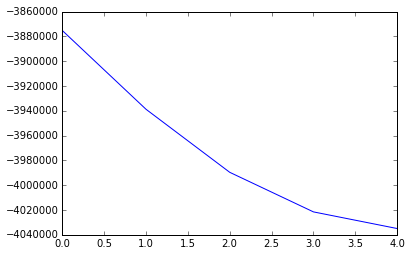

In [16]:
plt.plot(LL)

In [28]:
H.graph.build(10)

In [12]:
H.graph.theta.T

array([[  7.37979488e-02,   1.92264893e-05,   5.49658268e-07, ...,
          2.23376658e-04,   1.11510482e-05,   1.54279594e-06],
       [  6.54094916e-01,   2.23691070e-05,   3.96941419e-05, ...,
          6.29009107e-05,   1.38609064e-04,   1.30474662e-04],
       [  2.37843511e-03,   3.70396649e-02,   7.89113368e-01, ...,
          2.23539730e-04,   3.59168563e-03,   1.22216898e-05],
       ..., 
       [  1.55274244e-01,   1.90131787e-04,   5.42546908e-01, ...,
          9.88999250e-05,   9.78893673e-02,   9.57739011e-04],
       [  5.04719859e-04,   1.06848124e-01,   1.23673555e-03, ...,
          1.04286074e-03,   1.43736051e-03,   2.19568436e-02],
       [  9.89590914e-05,   1.58348269e-03,   8.64146967e-04, ...,
          3.35096039e-02,   3.49720491e-04,   1.57857595e-04]])

In [13]:
H.graph.eta.T

array([[ 0.00436018,  0.99563982],
       [ 0.03009665,  0.96990335],
       [ 0.00127528,  0.99872472],
       ..., 
       [ 0.32407117,  0.67592883],
       [ 0.02865951,  0.97134049],
       [ 0.05994803,  0.94005197]])

In [51]:
phi1 = H.graph.phis[1] + H.graph.phis[2].dot(H.graph.psis[1].T)

In [17]:
H.printLevel(1, {"phi_top"}, 30)

Top phi:
Topic 0 государство, страна, политический, система, мировой, советский, ссср, сша, правительство, развитие, становиться, класс, рабочий, новый, результат, второй, значительно, режим, хозяйство, международный, промышленный, х, рост, большевик, кризис, структура, способствовать, приводить, экономический
Topic 1 слово, предложение, например, вопрос, простой, глагол, я, или, часть, форма, сложный, связь, пример, кто, выражать, действие, член, имя, нет, оно, существительное, текст, указывать, обозначать, относиться, союз, отвечать, стоять, признак
Topic 2 земля, природа, наш, наука, явление, географический, планета, человечество, название, открывать, первый, знание, изучать, животное, цивилизация, изучение, ученый, карта, открытие, география, атмосфера, живой, исследование, научный, атмосферный, современный, объект, впервые, называть
Topic 3 быть, год, период, власть, после, первый, начинать, становиться, государственный, россия, политика, империя, однако, российский, крестьянин, н

In [ ]:
print "Top phi:"
sorted_idxs = np.argsort(phi1, axis=0)
for i in range(sorted_idxs.shape[1]):
    print "Topic", str(i), ", ".join([H.dictionary[j].lower() for j in sorted_idxs[:-30:-1, i]])

In [11]:
H.addReg(0, "sp_sm_Phi_prior", np.array([-5000]*5+[10000, 0])*10, 10)
H.addReg(0, "sp_sm_Phi", np.array([0 for i in range(6)]+[-10]))
H.addReg(0, "sp_sm_Theta", np.array([-5]*5+[10, 10])*0.1, 10)
H.addReg(0, "dec", 1e6)
%time H.constructLevel(0, 10)

iteration = 0
iteration = 1
iteration = 2
iteration = 3
iteration = 4
iteration = 5
iteration = 6
iteration = 7
iteration = 8
iteration = 9
Wall time: 32.5 s


In [14]:
np.set_printoptions(precision=4, suppress=True)
H.levels[0].theta.T[:10]

array([[ 0.    ,  0.1704,  0.2359,  0.5668,  0.0269],
       [ 0.    ,  0.006 ,  0.    ,  0.9659,  0.0282],
       [ 0.    ,  0.    ,  0.    ,  0.9931,  0.0069],
       [ 0.    ,  0.3306,  0.0545,  0.5838,  0.0311],
       [ 0.4913,  0.0015,  0.0039,  0.4969,  0.0064],
       [ 0.3845,  0.    ,  0.    ,  0.5561,  0.0594],
       [ 0.    ,  0.    ,  0.3305,  0.4704,  0.1991],
       [ 0.    ,  0.    ,  0.    ,  0.9821,  0.0179],
       [ 0.    ,  0.3   ,  0.    ,  0.6717,  0.0282],
       [ 0.    ,  0.5096,  0.    ,  0.4014,  0.0889]])

In [52]:
H.printLevel(1, {"phi_top"}, 20)

Top phi:
Topic 0 быть, в, тело, на, с, мы, предмет, то, колебание, скорость, что, время, от, по, t, i, при, температура, ускорение
Topic 1 в, предложение, слово, и, речь, который, например, глагол, не, с, что, на, или, к, как, я, член, он, главный
Topic 2 в, тело, энергия, и, движение, это, скорость, при, с, сила, на, масса, как, быть, а, другой, колебание, мочь, мы
Topic 3 и, в, он, то, быть, русский, человек, не, время, на, свой, герой, его, это, этот, который, роман, что, гоголь
Topic 4 в, который, на, не, быть, из, рынок, как, религиозный, ядерный, весь, количество, также, религия, император, становиться, а, год, труд
Topic 5 в, и, быть, мы, то, магнитный, что, который, на, с, тело, направление, при, они, поле, от, магнит, линия, этот
Topic 6 в, и, год, на, который, война, век, быть, население, государство, африка, школа, новый, военный, до, весь, начало, мировой, такой
Topic 7 в, и, который, на, быть, себя, как, для, это, с, лермонтов, не, свой, то, этот, экономический, он, общени

In [24]:
del H.levels[1]
H.addLevel(20, lambda_=1)

S= 20
costruct S= 20
Added 1 -th level
